In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#integrantes: Constanza Barrera, Constanza Burgos,Sandra Orellana

uploaded = files.upload()
df = pd.read_excel('DataSet_Grupo25.xlsx')

Saving DataSet_Grupo25.xlsx to DataSet_Grupo25 (4).xlsx


In [ ]:


# Reemplazar valores faltantes en columnas numéricas con la media
for column in df.select_dtypes(include=np.number):
  df[column] = df[column].fillna(df[column].mean())

# Reemplazar valores faltantes en columnas categóricas con la moda
for column in df.select_dtypes(include='object'):
  df[column].fillna(df[column].mode()[0], inplace=True)


<ipython-input-92-a6180d6bf063>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [ ]:
# Ver las primeras filas del dataset
print(df.head())

# Resumen de los datos
print(df.info())

   ID                     Event                   Country Latitude Longitude  \
0   1         Barva, Costa Rica                Costa Rica    10.12     -84.2   
1   2           New Madrid, USA  United States of America    36.59    -89.53   
2   3           New Madrid, USA  United States of America    36.59    -89.53   
3   4  Marlborough, New Zealand               New Zealand   -41.48   173.42    
4   5    Wairarapa, New Zealand               New Zealand    -41.2   175.20    

   Year  Month   Day Time of Day (Universal Time Code)   Mw  ... Inventory  \
0  1772    2.0  15.0                          22:54:52  6.0  ...         N   
1  1811   12.0  16.0                          08:15:00  7.6  ...         N   
2  1812    2.0   7.0                          09:45:00  7.8  ...         N   
3  1848   10.0  15.0                          14:10:00  7.5  ...         N   
4  1855    1.0  23.0                          09:32:00  8.2  ...         N   

   Total Fatalities Total Injuries Landslide Fatal

In [ ]:
# Imputa valores faltantes con la media
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']: # Check if column is numeric
        df[column].fillna(df[column].mean(), inplace=True)


# Verifica si quedan valores faltantes
print(df.isnull().sum())

ID                                   0
Event                                0
Country                              0
Latitude                             0
Longitude                            0
Year                                 0
Month                                0
Day                                  0
Time of Day (Universal Time Code)    0
Mw                                   0
Fault Type                           0
Depth (km)                           0
Ms                                   0
USGS ShakeMap Availability           0
Inventory                            0
Total Fatalities                     0
Total Injuries                       0
Landslide Fatalities                 0
Area Affected (km^2)                 0
Number of Landslides (Primary)       0
mLS (Primary)                        0
Max Epicentral Distance (km)         0
Urban Population                     0
Rural population                     0
dtype: int64


<ipython-input-94-89ebe438dc50>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [ ]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].mean(), inplace=True)

    if column == 'Mw' and df[column].dtype == 'object':
        df[column] = pd.to_numeric(df[column], errors='coerce')

print(df.isnull().sum())

df = df[(df['Mw'] >= 2.0) & (df['Mw'] <= 9.5)]

ID                                   0
Event                                0
Country                              0
Latitude                             0
Longitude                            0
Year                                 0
Month                                0
Day                                  0
Time of Day (Universal Time Code)    0
Mw                                   0
Fault Type                           0
Depth (km)                           0
Ms                                   0
USGS ShakeMap Availability           0
Inventory                            0
Total Fatalities                     0
Total Injuries                       0
Landslide Fatalities                 0
Area Affected (km^2)                 0
Number of Landslides (Primary)       0
mLS (Primary)                        0
Max Epicentral Distance (km)         0
Urban Population                     0
Rural population                     0
dtype: int64


<ipython-input-95-556b2809031f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Latitude', 'Longitude', 'Mw', 'Depth (km)', 'Ms', 'Area Affected (km^2)', 'Urban Population', 'Rural population']]
y = df[['Latitude','Longitude']]

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].mean(), inplace=True)

df['Mw'] = pd.to_numeric(df['Mw'], errors='coerce')
df.dropna(subset=['Mw'], inplace=True)

# Verifica si quedan valores faltantes
print(df.isnull().sum())

df = df[(df['Mw'] >= 2.0) & (df['Mw'] <= 9.5)]

ID                                   0
Event                                0
Country                              0
Latitude                             0
Longitude                            0
Year                                 0
Month                                0
Day                                  0
Time of Day (Universal Time Code)    0
Mw                                   0
Fault Type                           0
Depth (km)                           0
Ms                                   0
USGS ShakeMap Availability           0
Inventory                            0
Total Fatalities                     0
Total Injuries                       0
Landslide Fatalities                 0
Area Affected (km^2)                 0
Number of Landslides (Primary)       0
mLS (Primary)                        0
Max Epicentral Distance (km)         0
Urban Population                     0
Rural population                     0
dtype: int64


<ipython-input-97-22b5d05e1633>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Convert problematic columns to numeric, replacing non-numeric values with NaN
for column in ['Mw', 'Depth (km)', 'Rural population', 'Total Fatalities']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Group data and aggregate, handling NaN values
df_grouped = df.groupby('Country').agg({
    'Mw': 'mean',
    'Depth (km)': 'mean',
    'Rural population': 'mean',
    'Total Fatalities': 'sum'
}).reset_index()
#Seleccionar las características (X) y la variable objetivo (y)
X = df_grouped[['Mw', 'Depth (km)', 'Rural population']]  # Características seleccionadas
y = df_grouped['Total Fatalities']  # Variable objetivo

X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

#División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalización de las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creación y entrenamiento del modelo de regresión múltiple
model = LinearRegression()
model.fit(X_train, y_train)

#Predicción sobre el conjunto de prueba
y_pred = model.predict(X_test)

#Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')

#Predicción para un nuevo país
nuevo_pais = [[7.5, 50, 10000000]]

# Normalizar las características del nuevo país
nuevo_pais_normalizado = scaler.transform(nuevo_pais)

# Realizar la predicción
prediccion_fatalidades_pais = model.predict(nuevo_pais_normalizado)
print(f'Predicción del total de fatalidades para el país: {prediccion_fatalidades_pais[0]}')




Error Cuadrático Medio (MSE): 4074951476.4491425
Coeficiente de Determinación (R^2): -0.29049591177685485
Predicción del total de fatalidades para el país: 3844.372258191186


<ipython-input-98-5d06f1f6e0b2>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Resumen descriptivo de los datos

print(df.describe())


               ID         Year       Month         Day          Mw  \
count  275.000000   275.000000  275.000000  275.000000  275.000000   
mean   140.389091  1986.516364    6.430657   15.996350    6.714652   
std     81.918630    38.194884    3.224667    8.434158    0.884789   
min      1.000000  1772.000000    1.000000    1.000000    3.700000   
25%     69.500000  1977.000000    4.000000   10.000000    6.100000   
50%    140.000000  1996.000000    6.000000   16.000000    6.700000   
75%    212.500000  2013.000000    9.000000   23.000000    7.300000   
max    281.000000  2021.000000   12.000000   31.000000    9.500000   

       Depth (km)  Total Fatalities  Landslide Fatalities  mLS (Primary)  \
count  275.000000        274.000000            275.000000   2.750000e+02   
mean    26.706182       5035.974453            482.570909   4.870431e+08   
std     46.245719      27324.078360           3291.716012   1.103744e+09   
min      0.000000          0.000000              0.000000   0.000

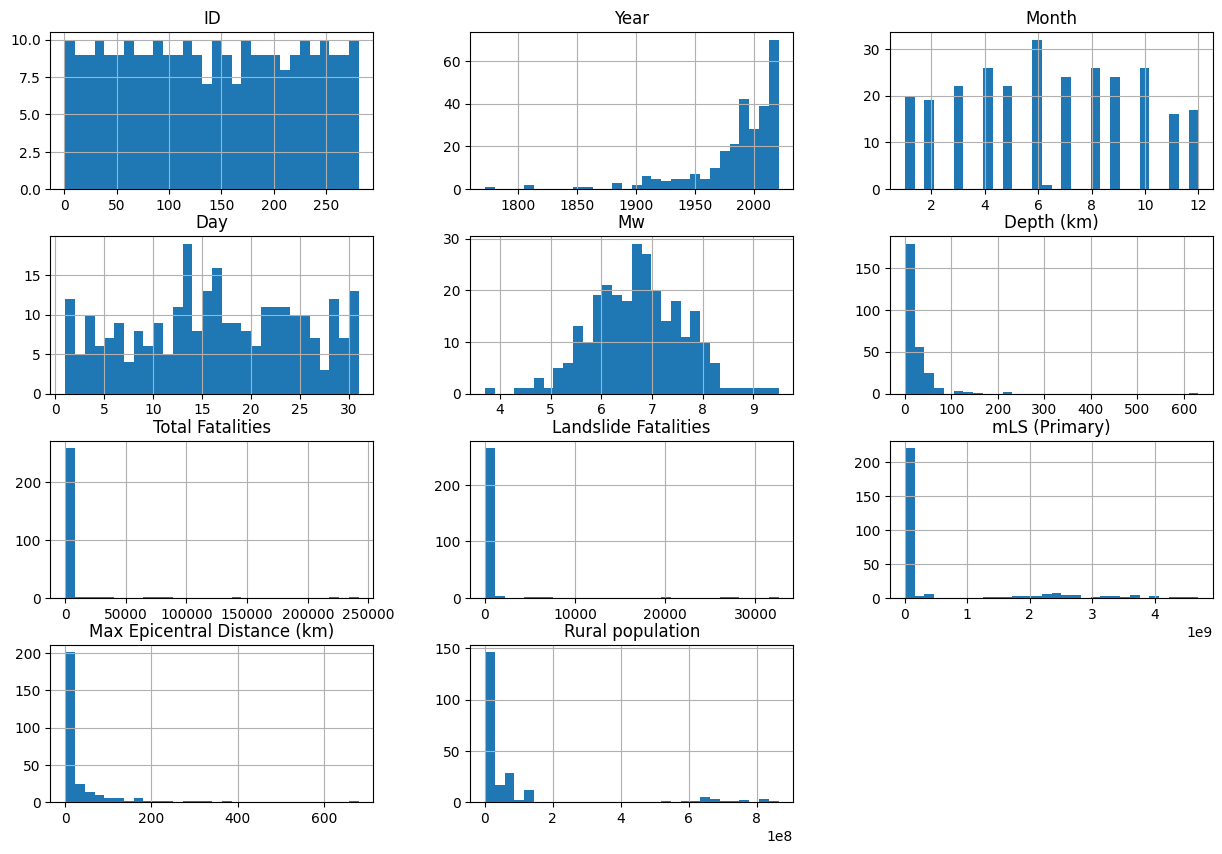

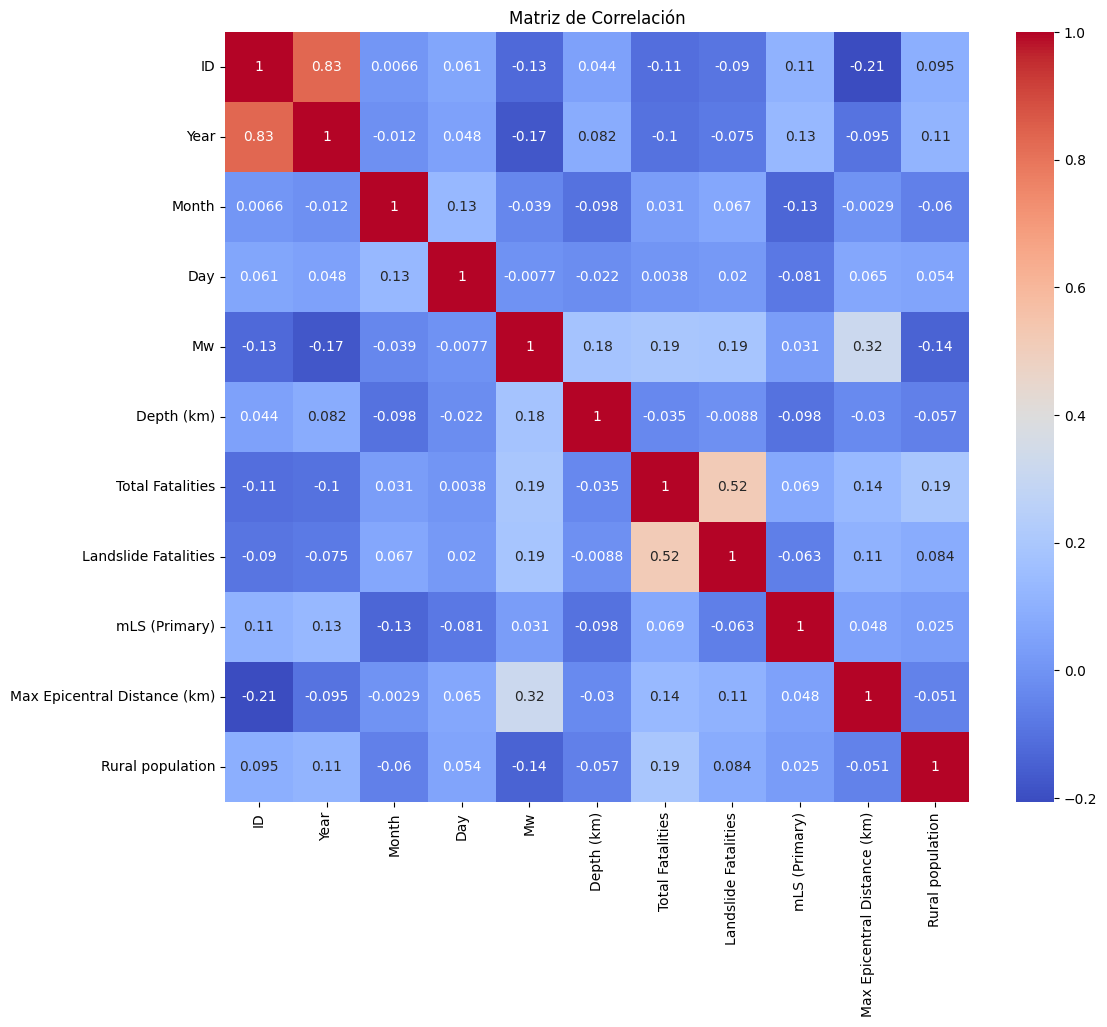

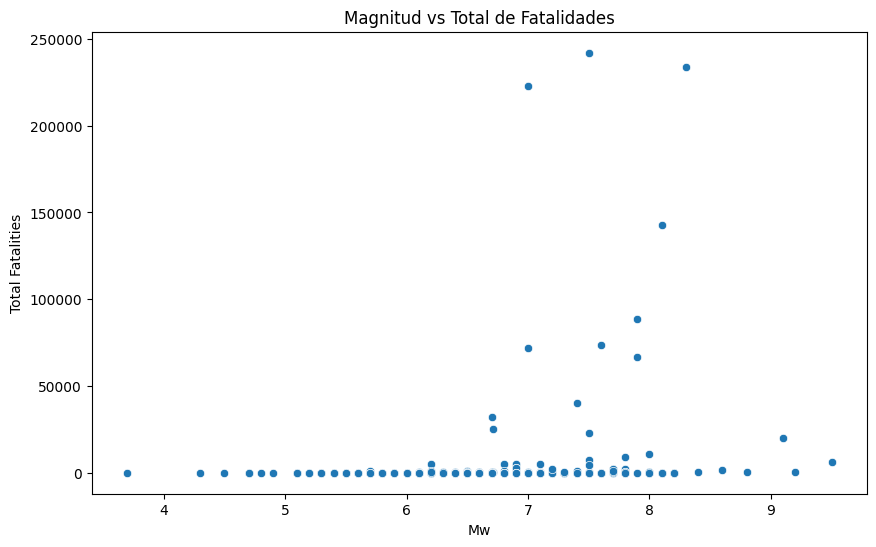

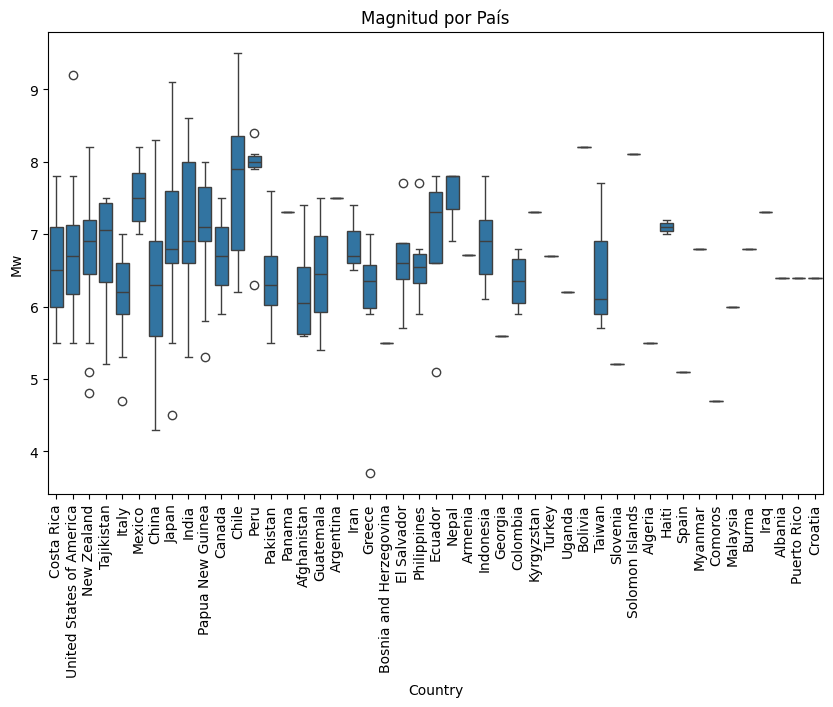

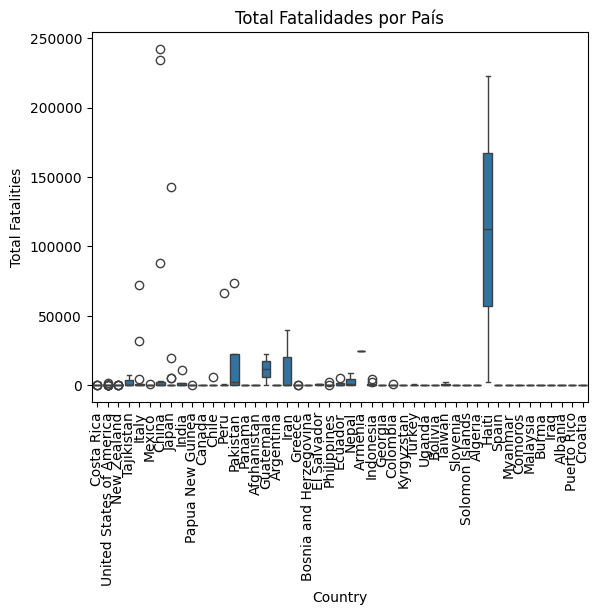

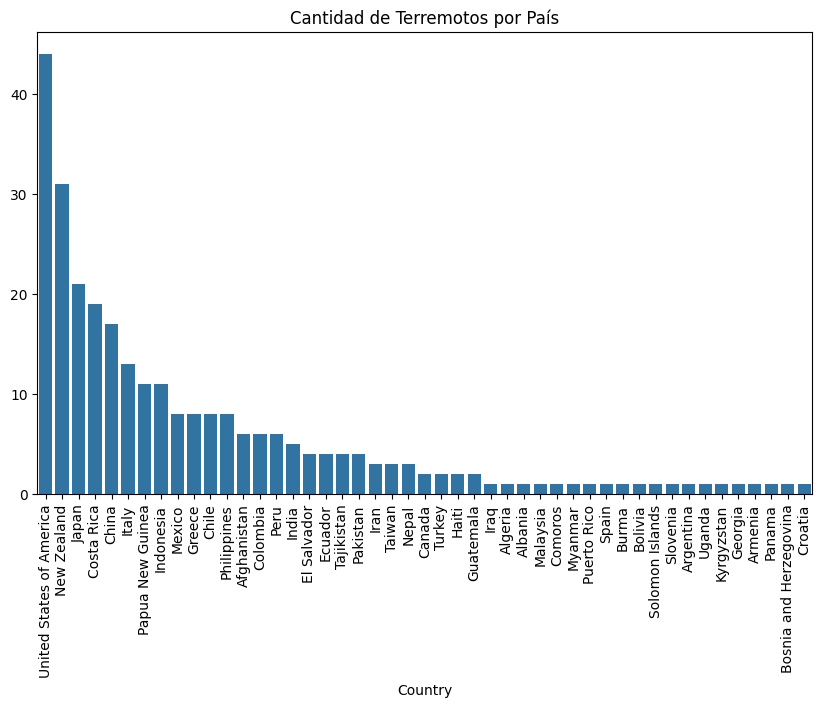

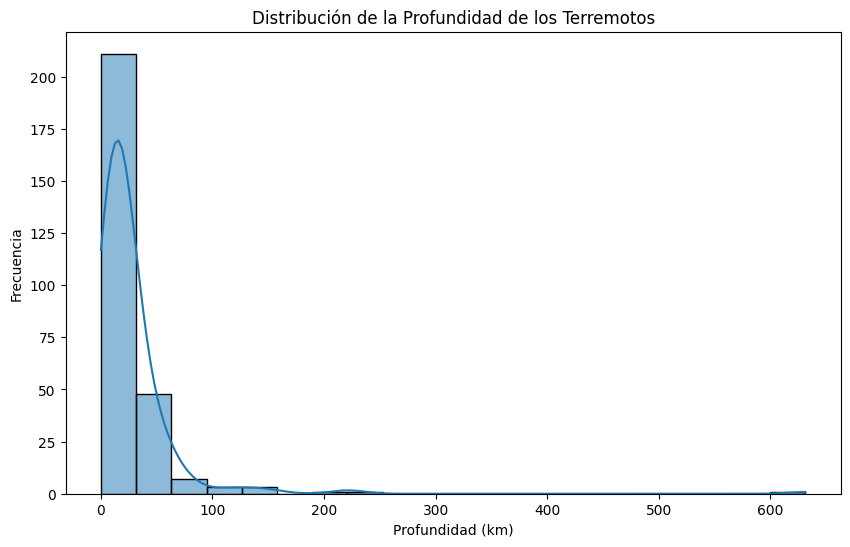

In [ ]:
#Analisis exploratorio de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Análisis de la distribución de las variables numéricas
numeric_df.hist(bins=30, figsize=(15, 10))
plt.show()

# Matriz de correlación
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Diagrama de dispersión para variables relevantes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mw', y='Total Fatalities', data=df)
plt.title('Magnitud vs Total de Fatalidades')
plt.show()

# Diagrama de caja para visualizar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Mw', data=df)
plt.title('Magnitud por País')
plt.xticks(rotation=90)
plt.show()

# Análisis de la relación entre variables categóricas y numéricas
sns.boxplot(x='Country', y='Total Fatalities', data=df)
plt.xticks(rotation=90)
plt.title('Total Fatalidades por País')
plt.show()

# Contar la cantidad de terremotos por país
country_counts = df['Country'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation=90)
plt.title('Cantidad de Terremotos por País')
plt.show()

# Gráfico de barras para la variable 'Depth (km)'
plt.figure(figsize=(10, 6))
sns.histplot(df['Depth (km)'], bins=20, kde=True)
plt.xlabel('Profundidad (km)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Profundidad de los Terremotos')
plt.show()

# Puedes agregar más análisis según las necesidades de tu EDA, como la distribución de la magnitud, la relación entre la profundidad y la magnitud, etc.


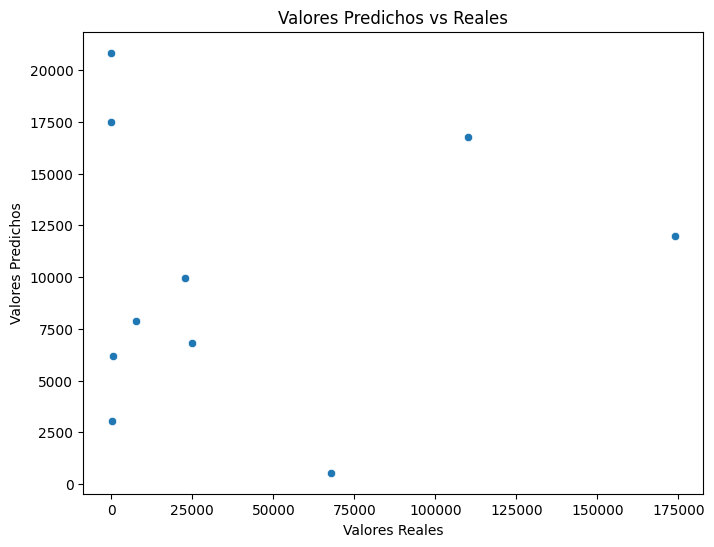

In [ ]:
#verificación consistencia del modelo
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Predichos vs Reales')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada (usando 5-fold por ejemplo)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()  # Se convierte en positivo para el MSE promedio

print(f"MSE promedio en validación cruzada: {cv_mse}")

MSE promedio en validación cruzada: 19855439536.915535


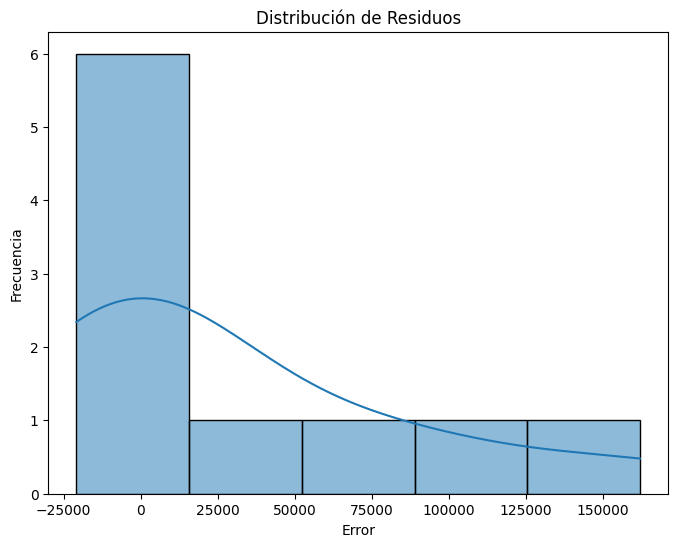

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribución de Residuos')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

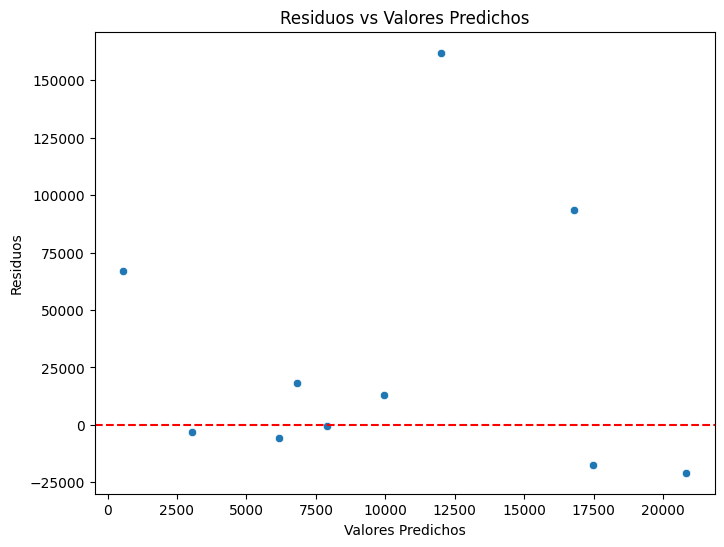

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Predichos')
plt.show()

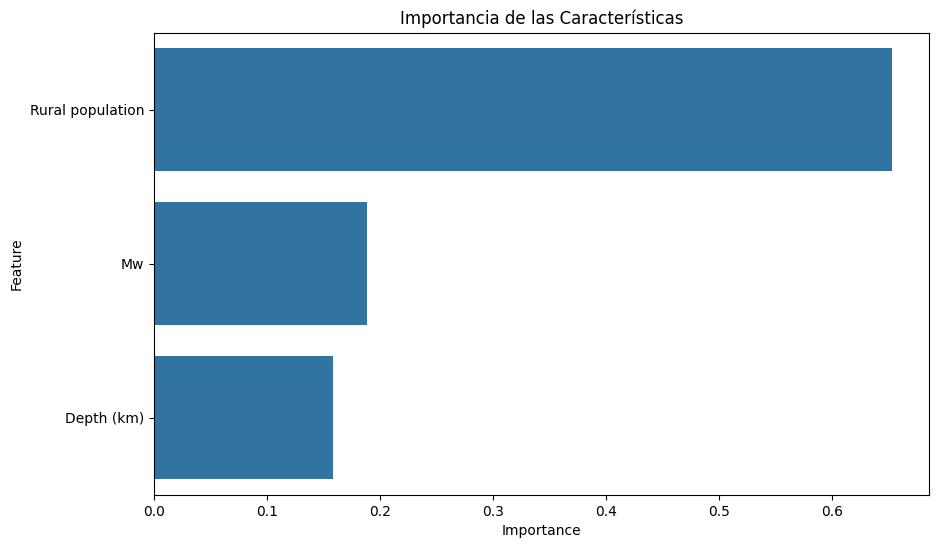

In [ ]:

# Dividir datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Obtener la importancia de las características
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importancia de las Características')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


rf = RandomForestRegressor(random_state=42)


random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=50, cv=3, verbose=2, n_jobs=-1, random_state=42)


random_search.fit(X_train, y_train)


print("Mejores hiperparámetros:", random_search.best_params_)


best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)


mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Optimizado - MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R^2: {r2_rf}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Mejores hiperparámetros: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30}
Random Forest Optimizado - MAE: 39773.43485770976, MSE: 3754813766.653173, RMSE: 61276.53520437634, R^2: -0.18911153748798482


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV # import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configurar el modelo de Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42)

# Espacio de búsqueda para los hiperparámetros
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar RandomizedSearchCV
random_search_gbr = RandomizedSearchCV(estimator=gbr, param_distributions=param_grid_gbr,
                                       n_iter=50, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Ajustar el modelo
random_search_gbr.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para Gradient Boosting:", random_search_gbr.best_params_)

# Evaluar el modelo con los mejores parámetros
best_gbr = random_search_gbr.best_estimator_
y_pred_gbr = best_gbr.predict(X_test)

# Calcular las métricas de rendimiento
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = mse_gbr ** 0.5
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Optimizado - MAE: {mae_gbr}, MSE: {mse_gbr}, RMSE: {rmse_gbr}, R^2: {r2_gbr}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Mejores hiperparámetros para Gradient Boosting: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.01}
Gradient Boosting Optimizado - MAE: 37328.31594072706, MSE: 3526223784.6749125, RMSE: 59382.01566699224, R^2: -0.11671940253349833


In [ ]:
#prueba de modelo


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
if df is not None:

    columnas_necesarias = ['ID', 'Latitude', 'Longitude', 'Mw', 'Fault Type', 'Depth (km)', 'Ms', 'Area Affected (km^2)', 'Urban Population', 'Rural population', 'Total Fatalities']
    for col in columnas_necesarias:
        if col not in df.columns:
            print(f"Error: La columna '{col}' no está en los datos. Revisa los nombres de las columnas.")

    df= df[columnas_necesarias].dropna()

    X = df[['ID', 'Mw', 'Fault Type', 'Depth (km)', 'Area Affected (km^2)', 'Urban Population', 'Rural population']]
    y = df['Total Fatalities']

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Definimos los modelos
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Definimos el número de "folds" para la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Definimos las métricas
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'R2': make_scorer(r2_score)
}


In [ ]:

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_fault_type = encoder.fit_transform(X[['Fault Type']])


encoded_feature_names = encoder.get_feature_names_out(['Fault Type'])


encoded_df = pd.DataFrame(encoded_fault_type, columns=encoded_feature_names, index=X.index)

X = X.drop('Fault Type', axis=1)
X = pd.concat([X, encoded_df], axis=1)


In [ ]:
# Validación cruzada para Random Forest
print("Validación cruzada para Random Forest:")
rf_scores = {}
for metric_name, scorer in scoring.items():
    scores = cross_val_score(rf_model, X, y, cv=kf, scoring=scorer)
    rf_scores[metric_name] = {
        'Mean': scores.mean(),
        'Std': scores.std()
    }
    print(f"{metric_name} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")


Validación cruzada para Random Forest:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 239, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 1063, in predict
    X = self._validate_X_predict(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest

MAE - Mean: nan, Std: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 239, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 1063, in predict
    X = self._validate_X_predict(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest

MSE - Mean: nan, Std: nan
R2 - Mean: nan, Std: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 239, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 1063, in predict
    X = self._validate_X_predict(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest

In [ ]:

# Validación cruzada para Gradient Boosting
print("\nValidación cruzada para Gradient Boosting:")
gb_scores = {}
for metric_name, scorer in scoring.items():
    scores = cross_val_score(gb_model, X, y, cv=kf, scoring=scorer)
    gb_scores[metric_name] = {
        'Mean': scores.mean(),
        'Std': scores.std()
    }
    print(f"{metric_name} - Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

# Almacenamiento de los resultados
{'Random Forest Scores': rf_scores, 'Gradient Boosting Scores': gb_scores}



Validación cruzada para Gradient Boosting:
MAE - Mean: nan, Std: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 239, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 2127, in predict
    X = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 633, in _val

MSE - Mean: nan, Std: nan
R2 - Mean: nan, Std: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 239, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 2127, in predict
    X = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 633, in _val

{'Random Forest Scores': {'MAE': {'Mean': nan, 'Std': nan},
  'MSE': {'Mean': nan, 'Std': nan},
  'R2': {'Mean': nan, 'Std': nan}},
 'Gradient Boosting Scores': {'MAE': {'Mean': nan, 'Std': nan},
  'MSE': {'Mean': nan, 'Std': nan},
  'R2': {'Mean': nan, 'Std': nan}}}